In [1]:
from sklearn import datasets
import sklearn
import pandas as pd
import numpy as np
import numpy.random as nr
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#n_rows, n_cols = map(int, input("Enter the number of rows followed by the number of columns: ").split())
#cols = input("Enter the names of the fields: ").split()
credit = pd.read_csv("German_Credit.csv", header=None)
auto_prices = pd.read_csv("Automobile price data _Raw_.csv")
credit.columns = ['customer_id',
                  'checking_account_status', 'loan_duration_mo', 'credit_history', 
                  'purpose', 'loan_amount', 'savings_account_balance', 
                  'time_employed_yrs', 'payment_pcnt_income','gender_status', 
                  'other_signators', 'time_in_residence', 'property', 'age_yrs',
                  'other_credit_outstanding', 'home_ownership', 'number_loans', 
                  'job_category', 'dependents', 'telephone', 'foreign_worker', 
                  'bad_credit']
folds = int(input("Enter the number of folds: "))
cols = auto_prices.columns
auto_prices.columns = [str.replace('-', '_') for str in cols]

## Treat missing values
## Remove rows with missing values, accounting for mising values coded as '?'
cols = ['price', 'bore', 'stroke', 
      'horsepower', 'peak_rpm']
for column in cols:
    auto_prices.loc[auto_prices[column] == '?', column] = np.nan
auto_prices.dropna(axis = 0, inplace = True)

## Transform column data type
## Convert some columns to numeric values
for column in cols:
    auto_prices[column] = pd.to_numeric(auto_prices[column])
elems = np.array([nr.randint(1, folds+1) for elem in range(credit.shape[0])])
credit['fold'] = elems
credit.drop(['customer_id'], axis=1, inplace=True)
print(np.array(credit[credit['age_yrs'] == 60].index).size) #number of 60 year-olds in the dataset
credit.head()

Enter the number of folds: 4
6


,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,other_signators,...,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit,fold
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,67,A143,A152,2,A173,1,A192,A201,1,4
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,22,A143,A152,1,A173,1,A191,A201,2,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,49,A143,A152,1,A172,2,A191,A201,1,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,45,A143,A153,1,A173,2,A191,A201,1,3
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,53,A143,A153,2,A173,2,A191,A201,2,2


In [3]:
code_list = [['checking_account_status', 
             {'A11' : '< 0 DM', 
              'A12' : '0 - 200 DM', 
              'A13' : '> 200 DM or salary assignment', 
              'A14' : 'none'}],
            ['credit_history',
            {'A30' : 'no credit - paid', 
             'A31' : 'all loans at bank paid', 
             'A32' : 'current loans paid', 
             'A33' : 'past payment delays', 
             'A34' : 'critical account - other non-bank loans'}],
            ['purpose',
            {'A40' : 'car (new)', 
             'A41' : 'car (used)',
             'A42' : 'furniture/equipment',
             'A43' : 'radio/television', 
             'A44' : 'domestic appliances', 
             'A45' : 'repairs', 
             'A46' : 'education', 
             'A47' : 'vacation',
             'A48' : 'retraining',
             'A49' : 'business', 
             'A410' : 'other' }],
            ['savings_account_balance',
            {'A61' : '< 100 DM', 
             'A62' : '100 - 500 DM', 
             'A63' : '500 - 1000 DM', 
             'A64' : '>= 1000 DM',
             'A65' : 'unknown/none' }],
            ['time_employed_yrs',
            {'A71' : 'unemployed',
             'A72' : '< 1 year', 
             'A73' : '1 - 4 years', 
             'A74' : '4 - 7 years', 
             'A75' : '>= 7 years'}],
            ['gender_status',
            {'A91' : 'male-divorced/separated', 
             'A92' : 'female-divorced/separated/married',
             'A93' : 'male-single', 
             'A94' : 'male-married/widowed', 
             'A95' : 'female-single'}],
            ['other_signators',
            {'A101' : 'none', 
             'A102' : 'co-applicant', 
             'A103' : 'guarantor'}],
            ['property',
            {'A121' : 'real estate',
             'A122' : 'building society savings/life insurance', 
             'A123' : 'car or other',
             'A124' : 'unknown-none' }],
            ['other_credit_outstanding',
            {'A141' : 'bank', 
             'A142' : 'stores', 
             'A143' : 'none'}],
             ['home_ownership',
            {'A151' : 'rent', 
             'A152' : 'own', 
             'A153' : 'for free'}],
            ['job_category',
            {'A171' : 'unemployed-unskilled-non-resident', 
             'A172' : 'unskilled-resident', 
             'A173' : 'skilled',
             'A174' : 'highly skilled'}],
            ['telephone', 
            {'A191' : 'none', 
             'A192' : 'yes'}],
            ['foreign_worker',
            {'A201' : 'yes', 
             'A202' : 'no'}],
            ['bad_credit',
            {2 : 1,
             1 : 0}]]

for col_dic in code_list:
    col = col_dic[0]
    dic = col_dic[1]
    credit[col] = [dic[x] for x in credit[col]]


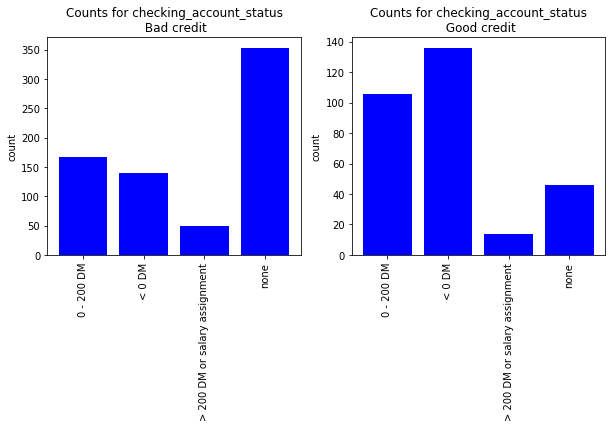

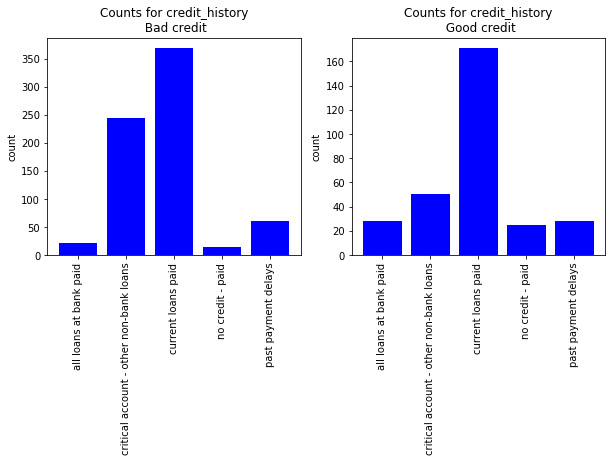

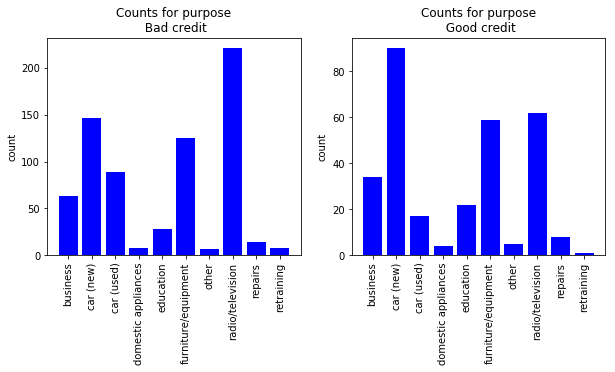

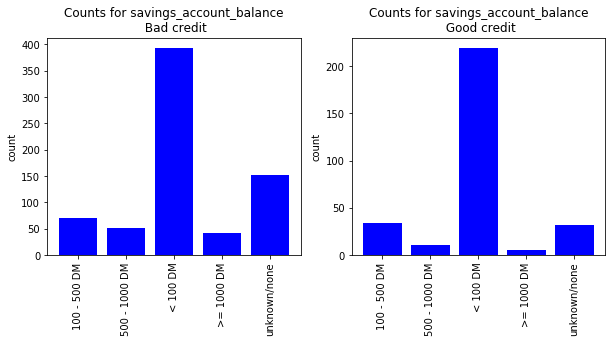

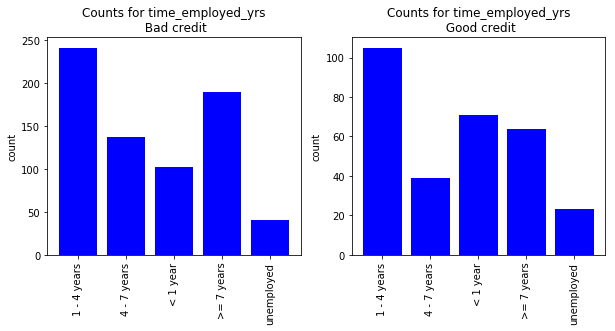

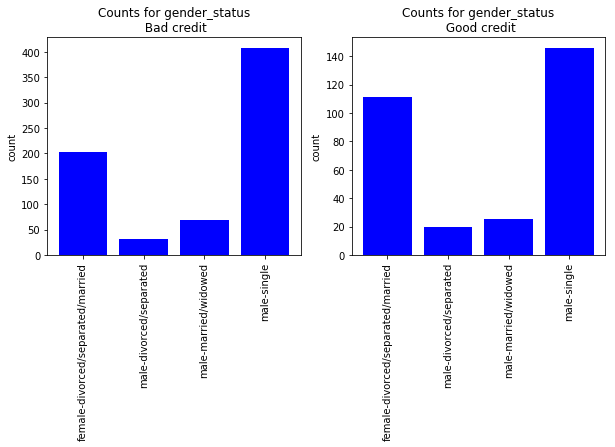

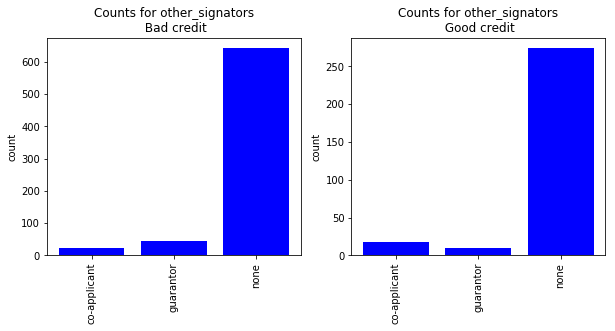

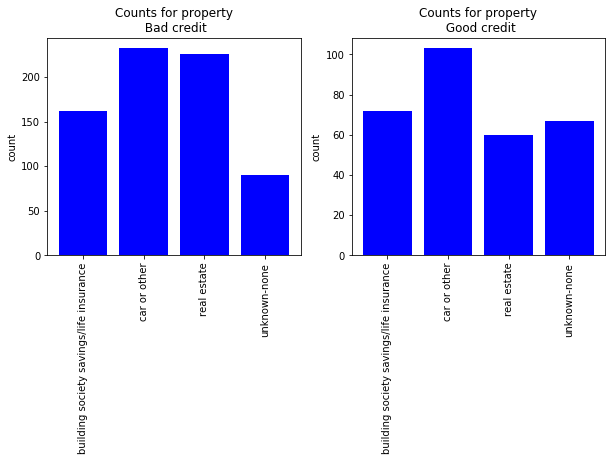

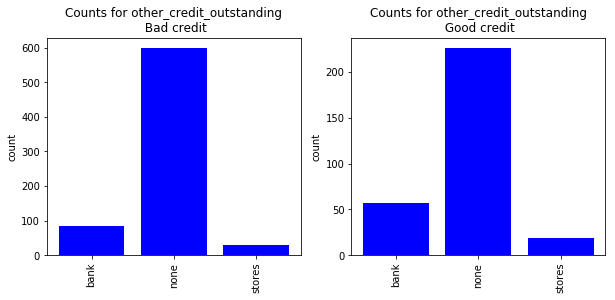

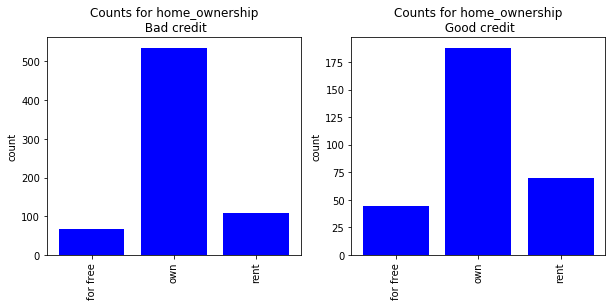

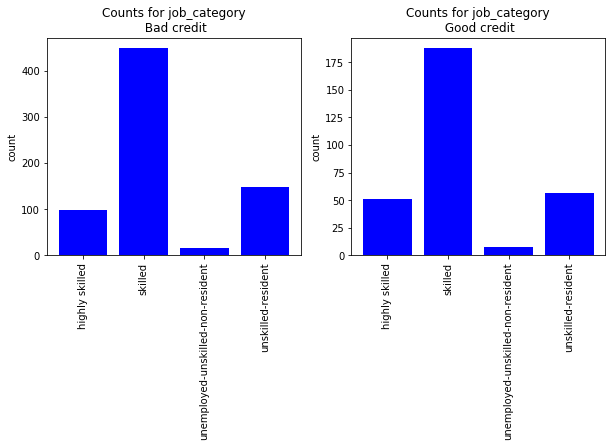

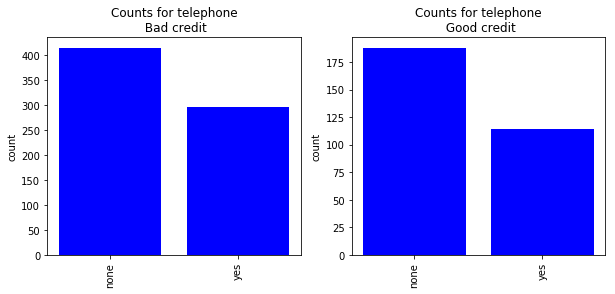

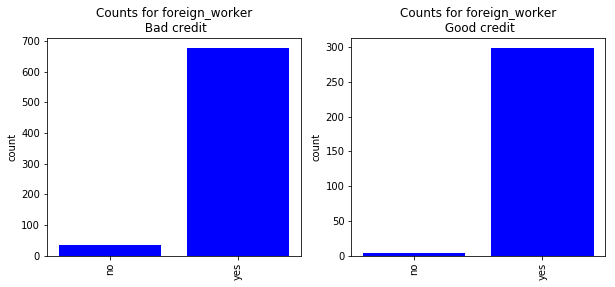

In [4]:
from collections import OrderedDict

# checking for label value imbalance (can be addressed by oversampling minority, undersampling majority, or )
val_counts = credit['bad_credit'].value_counts()
cat_cols = ['checking_account_status', 'credit_history', 'purpose', 'savings_account_balance', 
                  'time_employed_yrs', 'gender_status', 'other_signators', 'property', 
                  'other_credit_outstanding', 'home_ownership', 'job_category', 'telephone', 
                  'foreign_worker']
idxs = [i for i in range(len(cat_cols))]
cat_dict = OrderedDict(zip(idxs, cat_cols))
#cat_df = pd.DataFrame.from_dict(df, orient='index', columns = [cat_cols]) #w/o additional args from_dict(df) uses keys as col names and ints as row idxs,
#orient uses keys as row names and ints as col names or columns as col names
credit['dummy'] = np.ones(credit.shape[0])
for col in cat_dict.values():
    # get frequencies of each variable; from dummy, bad_credit, and col, dummy holds the counts of col and bad_credit subcategories
    counts = credit[['dummy', 'bad_credit', col]].groupby(['bad_credit', col], as_index = False).count()
    # store the counts when the bad_credit variable is 0, meaning good credit customers
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['bad_credit'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy, color = 'blue')
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Bad credit')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['bad_credit'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy, color = 'blue')
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Good credit')
    plt.ylabel('count')
    plt.show()


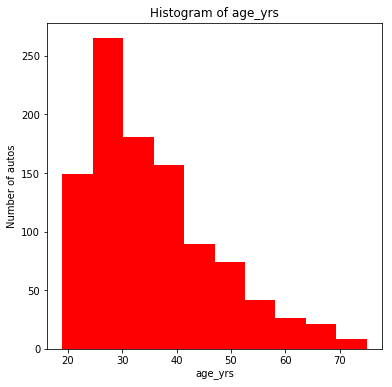

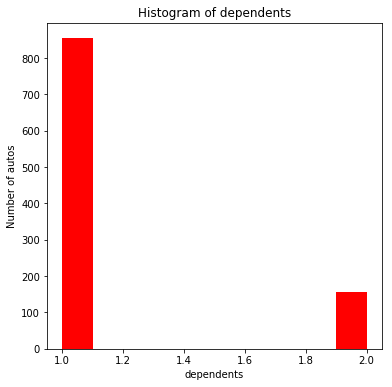

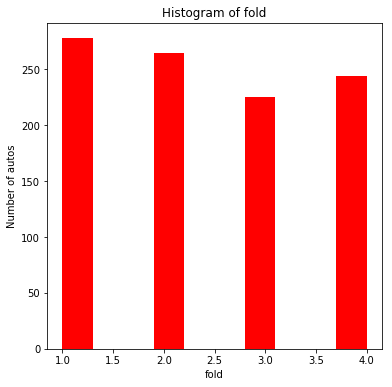

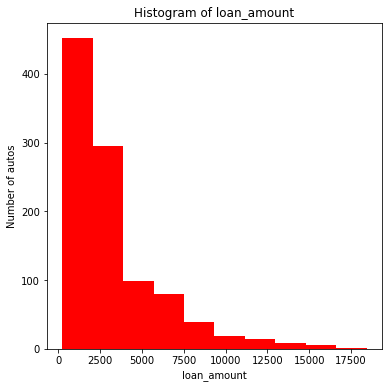

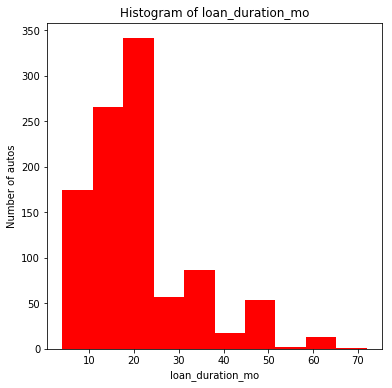

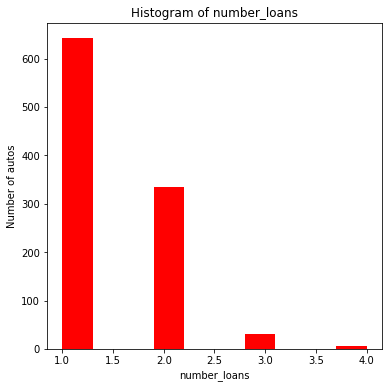

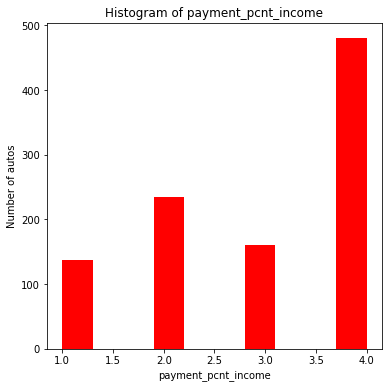

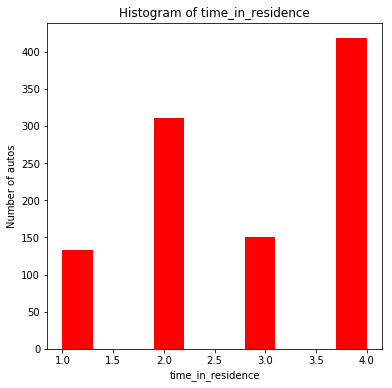

In [5]:
num_cols = list(credit.columns.difference(cat_cols))
num_credit = credit[num_cols].drop(['bad_credit', 'dummy'], axis = 1)
num_cols.remove('bad_credit')
num_cols.remove('dummy')
for col in num_cols:
    fig = plt.figure(figsize=(6,6)) # define plot area
    ax = fig.gca() # define axis    
    num_credit[col].plot.hist(ax = ax, bins = 10, color = 'red') # Use the plot.hist method on subset of the data frame
    ax.set_title('Histogram of ' + col) # Give the plot a main title
    ax.set_xlabel(col) # Set text for the x axis
    ax.set_ylabel('Number of autos')# Set text for y axis
    plt.show()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


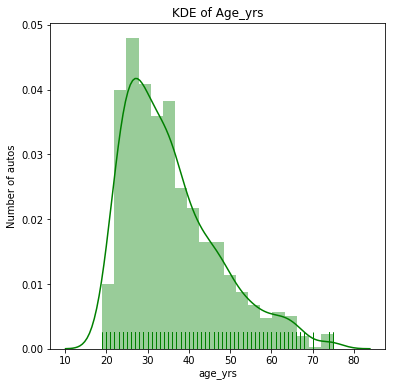

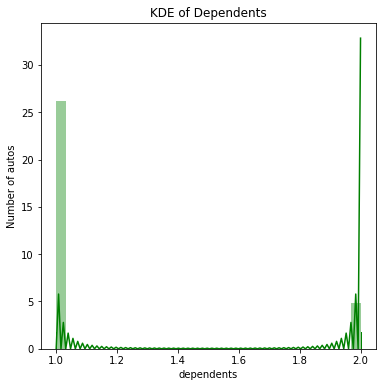

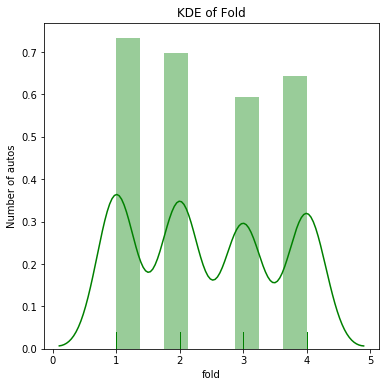

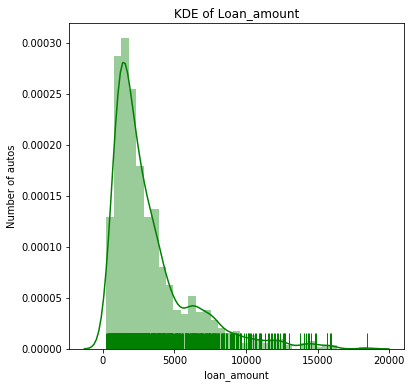

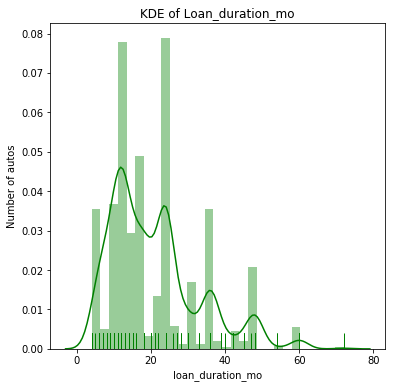

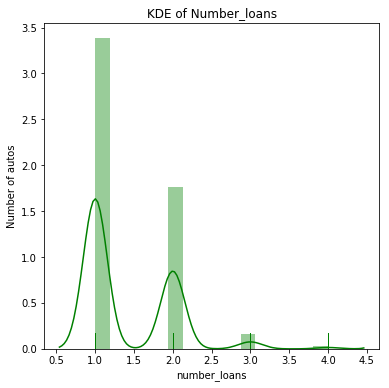

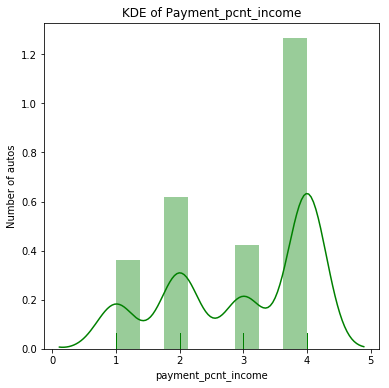

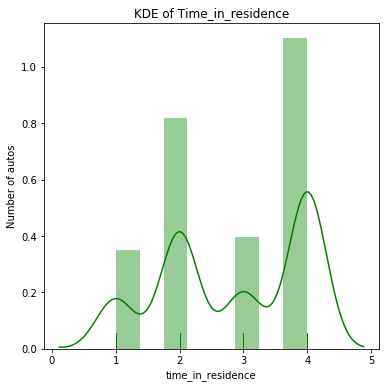

In [6]:
for col in num_cols:
    fig = plt.figure(figsize=(6,6)) # define plot area
    ax = fig.gca() # define axis
    #sns.distplot(num_credit[col], rug = True, hist = False, color = 'green') #do not need bins if not showing histogram
    sns.distplot(num_credit[col], rug = True, hist = True, color = 'green') # can specify bins otherwise, but not necessary
    ax.set_title('KDE of ' + col.capitalize()) # Give the plot a main title
    ax.set_xlabel(col) # Set text for the x axis
    ax.set_ylabel('Number of autos')# Set text for y axis
    plt.show()

0 std
1 turbo


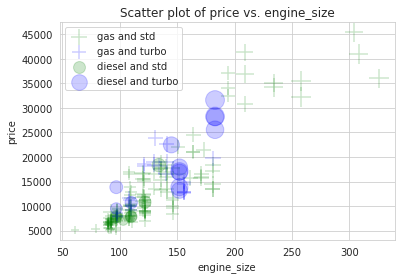

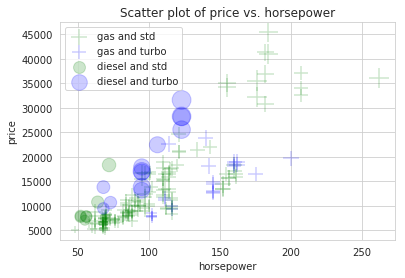

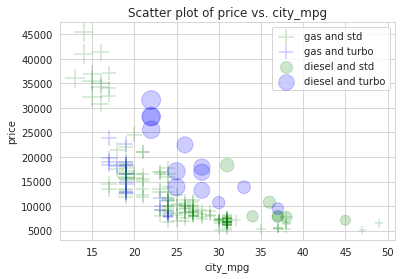

In [8]:
def plot_scatter_shape_size_col(auto_prices, cols, shape_col = 'fuel_type', size_col = 'curb_weight',
                            size_mul = 0.000025, color_col = 'aspiration', col_y = 'price', alpha = 0.2):
    shapes = ['+', 'o', 's', 'x', '^'] # pick distinctive shapes
    colors = ['green', 'blue', 'orange', 'magenta', 'gray'] # specify distinctive colors
    unique_cats = auto_prices[shape_col].unique()
    unique_colors = auto_prices[color_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            for j, color in enumerate(unique_colors):
                temp = auto_prices[(auto_prices[shape_col] == cat) & (auto_prices[color_col] == color)]
                sns.regplot(col, col_y, data=temp, marker = shapes[i],
                            scatter_kws={"alpha":alpha, "s":size_mul*temp[size_col]**2}, 
                            label = (cat + ' and ' + color), fit_reg = False, color = colors[j])
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.legend()
        plt.show()

num_cols = ['engine_size', 'horsepower', 'city_mpg']
[print(i, v) for i, v in enumerate(auto_prices['aspiration'].unique())]
plot_scatter_shape_size_col(auto_prices, num_cols)     

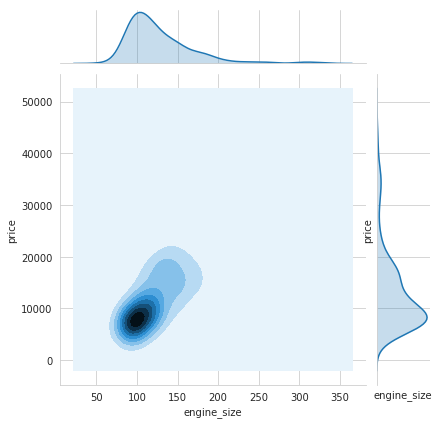

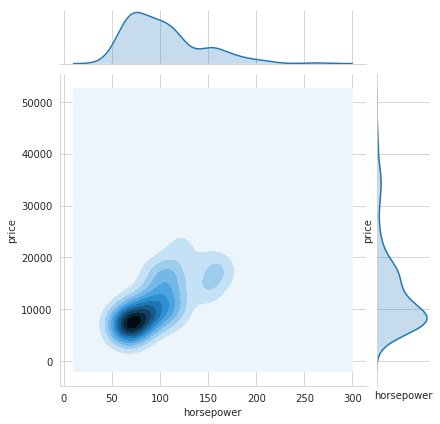

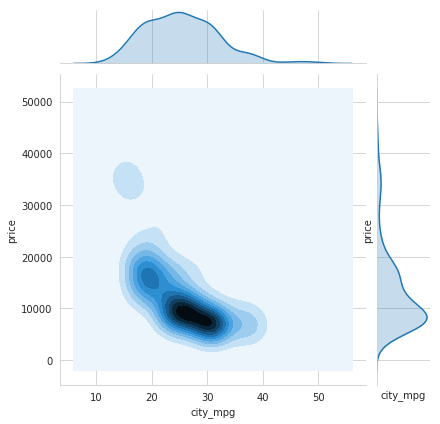

In [10]:
def plot_desity_2d(auto_prices, cols, col_y = 'price', kind ='kde'):
#kind= hex makes tiles hexagonal (easier for more intense calculation) and histogram instead of kde
    for col in cols:
        sns.set_style("whitegrid")
        sns.jointplot(col, col_y, data=auto_prices, kind=kind)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()

plot_desity_2d(auto_prices, num_cols)      

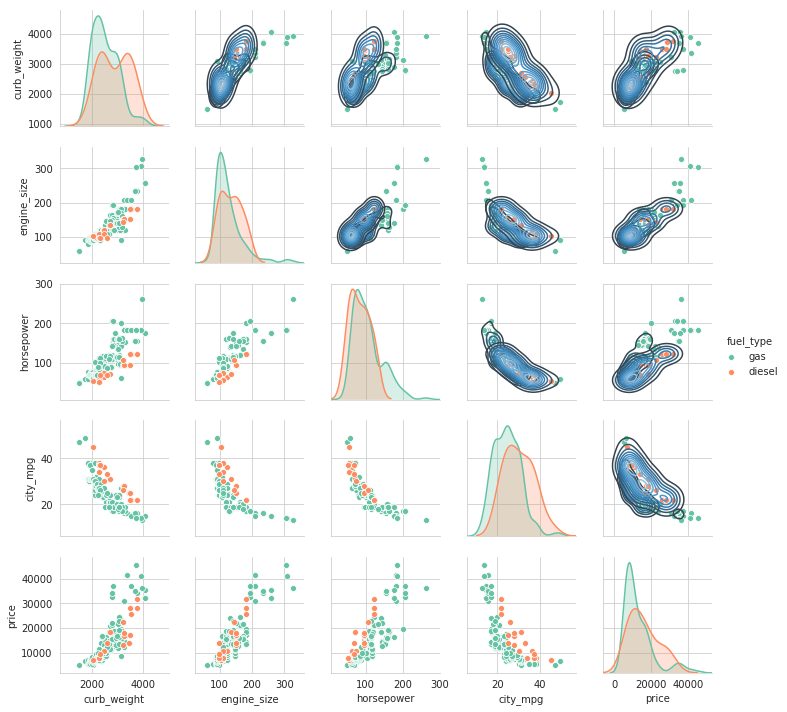

In [13]:
num_cols = ["curb_weight", "engine_size", "horsepower", "city_mpg", "price", "fuel_type"] 
sns.pairplot(auto_prices[num_cols], hue='fuel_type', palette="Set2", diag_kind="kde", height=2).map_upper(sns.kdeplot, cmap="Blues_d")

'drive_wheels'

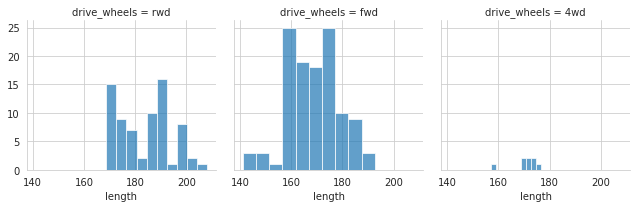

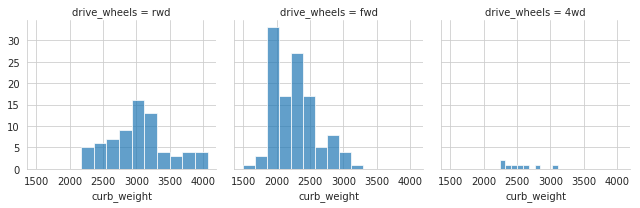

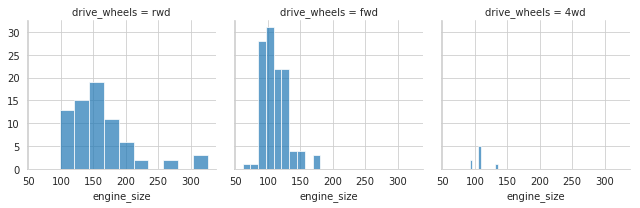

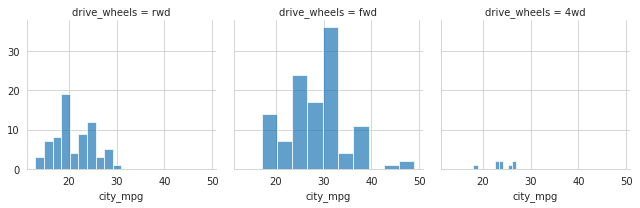

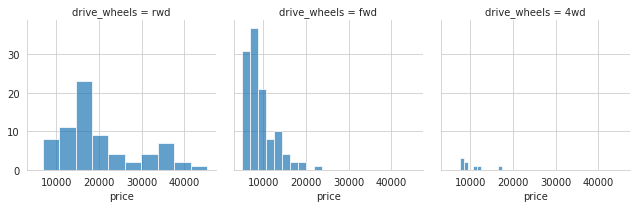

In [14]:
## Function to plot conditioned histograms
def cond_hists(df, plot_cols, grid_col):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ## Loop over the list of columns
    for col in plot_cols:
        grid1 = sns.FacetGrid(df, col=grid_col)
        grid1.map(plt.hist, col, alpha=.7)
    return grid_col

## Define columns for making a conditioned histogram
plot_cols2 = ["length",
               "curb_weight",
               "engine_size",
               "city_mpg",
               "price"]

cond_hists(auto_prices, plot_cols2, 'drive_wheels')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


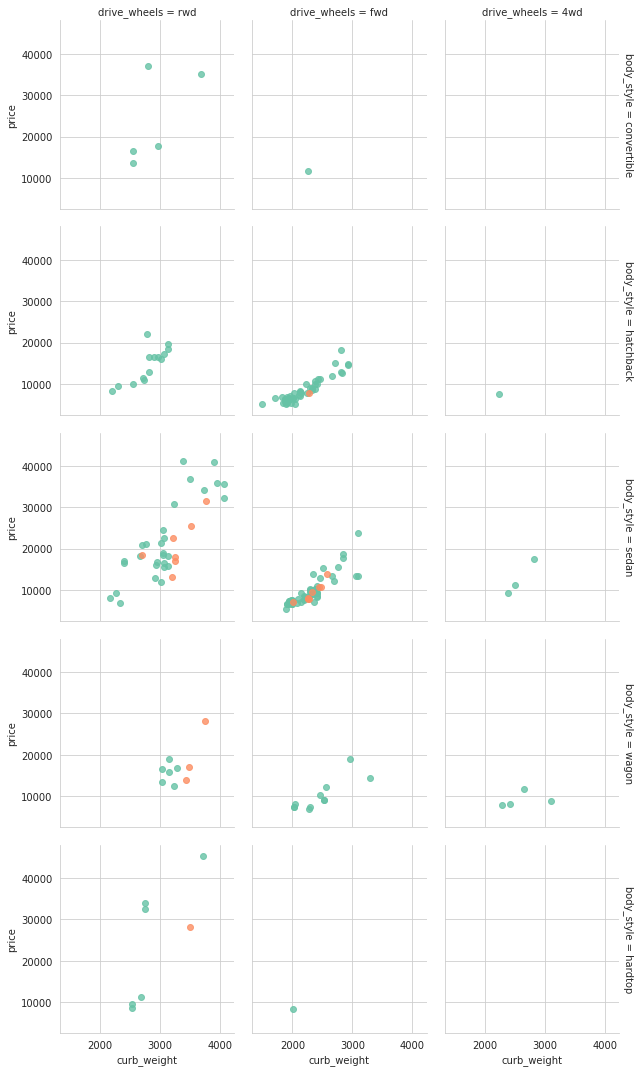

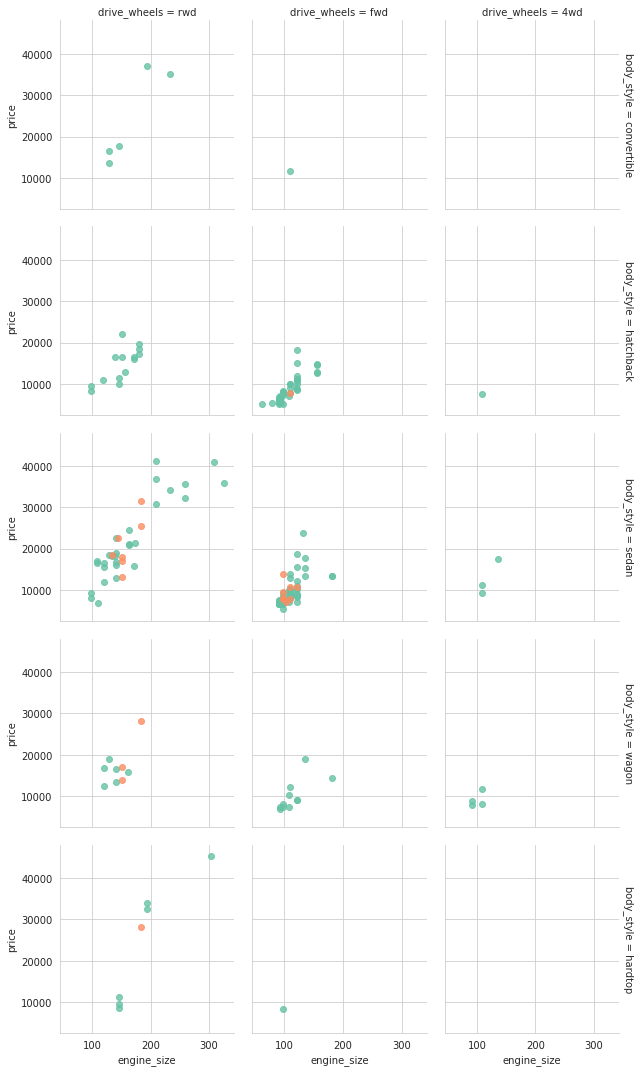

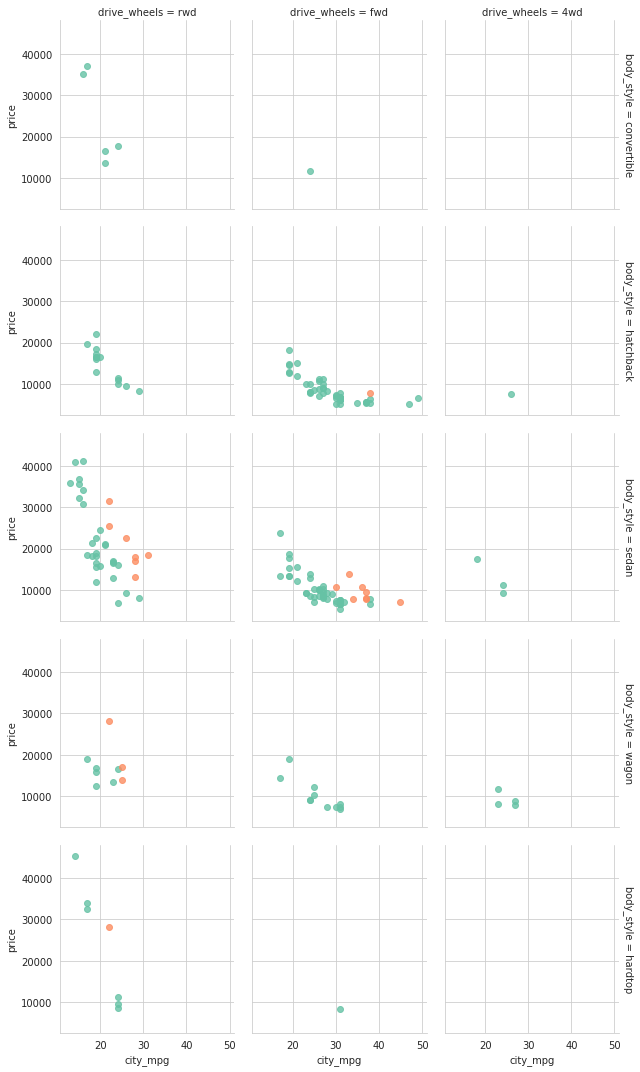

In [15]:
def cond_plot(cols):
    import IPython.html.widgets
    import seaborn as sns
    for col in cols:
        g = sns.FacetGrid(auto_prices, col="drive_wheels", row = 'body_style', 
                      hue="fuel_type", palette="Set2", margin_titles=True)
        g.map(sns.regplot, col, "price", fit_reg = False)

num_cols = ["curb_weight", "engine_size", "city_mpg"]
cond_plot(num_cols)    

In [43]:
from sklearn.datasets import fetch_california_housing

houses = fetch_california_housing()
cols = houses.feature_names
num_cols = len(cols)
num_rows = houses.data.shape[0]
shape = houses.data.shape
house_df = pd.DataFrame(columns = cols, data = houses.data)
labels = houses.target

In [ ]:
print(houses.DESCR)

In [44]:
folds = int(input("Enter the number of folds: "))
house_df.fold = pd.Series(np.random.randint(folds - 1, size = num_rows))

Enter the number of folds: 4


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  from ipykernel import kernelapp as app


In [45]:
import math
auto_prices.log_price = auto_prices['price'].apply(math.log)
auto_prices.log_price.head()

0    9.510075
1    9.711116
2    9.711116
3    9.543235
4    9.767095
Name: price, dtype: float64

In [46]:
house_df['Labels'] = labels
house_df.head(4)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Labels
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413


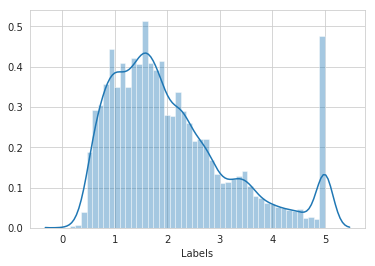

In [47]:
sns.distplot(house_df['Labels'], kde = True)

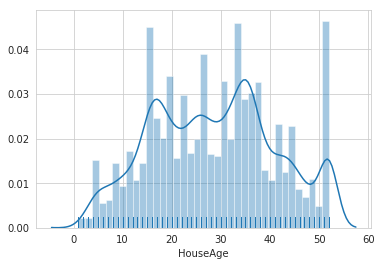

In [48]:
sns.distplot(house_df['HouseAge'], kde = True, rug = True)

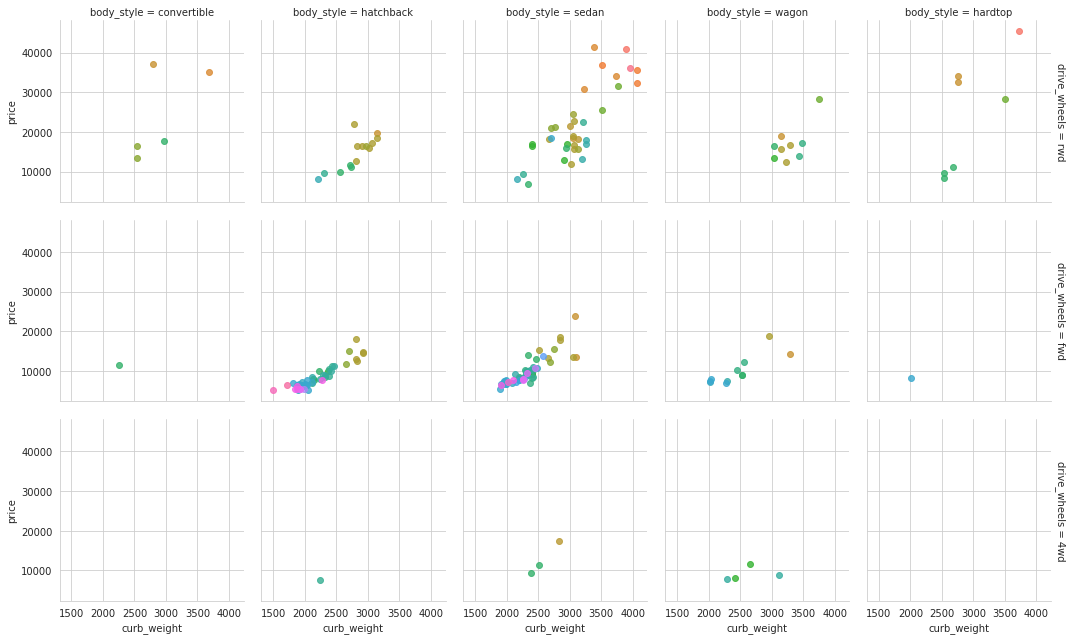

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
g = sns.FacetGrid(auto_prices, col = 'body_style', row = 'drive_wheels', hue = 'city_mpg', margin_titles=True)
g.map(sns.regplot, 'curb_weight', 'price', fit_reg = False)